#Referências
https://www.section.io/engineering-education/build-ann-with-keras/

#Importando bibliotecas

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Lendo dados, separando entre dados de teste e treino, pré-processando dados

In [6]:
#Lendo dataset
df = pd.read_csv("Qualitative_Bankruptcy.csv", names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness', 'Operating Risk', 'Class'])
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [7]:
#Aplicando transformação para termos valores númericos
df["Industrial Risk"]=preprocessing.LabelEncoder().fit_transform(df["Industrial Risk"])
df["Management Risk"]=preprocessing.LabelEncoder().fit_transform(df["Management Risk"])
df["Financial Flexibility"]=preprocessing.LabelEncoder().fit_transform(df["Financial Flexibility"])
df["Credibility"]=preprocessing.LabelEncoder().fit_transform(df["Credibility"])
df["Competitiveness"]=preprocessing.LabelEncoder().fit_transform(df["Competitiveness"])
df["Operating Risk"]=preprocessing.LabelEncoder().fit_transform(df["Operating Risk"])
df["Class"]=preprocessing.LabelEncoder().fit_transform(df["Class"])

df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [8]:
#Vamos separar os dados entre a variável dependente e independente
x = df.drop(['Class'], axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x.head()

(187, 6) (187,) (63, 6) (63,)


,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

#Iniciando e fazendo o treinamento da rede neural

In [10]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
print(x_train.shape)
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(None, 187, 6)))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

(187, 6)


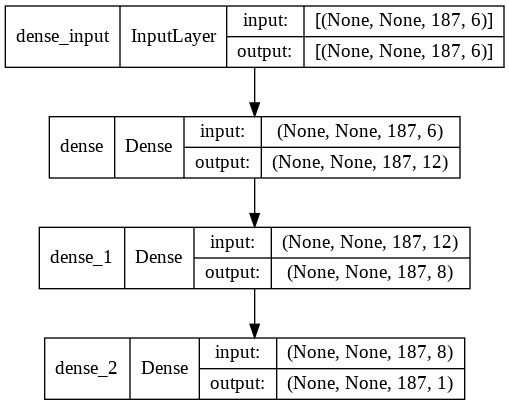

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [12]:
#Treinamento
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.4813
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.5348
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.4759
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4759
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4545
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.4759
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.4866
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.4920
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5187
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5187
Epoch 11/100
6/6 [===========

#Fazendo predição e verificando os acertos

In [13]:
#Predição:
y_pred = ann.predict(x_test)
#print(y_pred)

#Valores maiores que 0.5 significam "True", portanto ocorreu falência, e vice-versa, portanto vamos mapear em verdadeiro e falso
y_pred = y_pred > 0.5
#print(y_pred)

#Agora para quantificar os erros é necessário mapear True -> 1 e False -> 0
y_pred = 1*y_pred
#print(y_pred)

fig = go.Figure(data=[go.Table(header=dict(values=['Valor Predito', 'Valor Real de Teste']),
                 cells=dict(values=[y_pred, y_test]))
                     ])
fig.show()

In [14]:
#Quantidade de erros:
print("Quantidade de erros de predição: ", ((y_test-y_pred[:,0])**2).sum())

Quantidade de erros de predição:  1
